<a href="https://colab.research.google.com/github/ililillilili1/test2/blob/DA/page6_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 붓꽃 데이터 분석

In [ ]:
#6-1
import pandas as pd
filename='iris.csv'
iris=pd.read_csv(filename)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#6-2
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#6-3
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#품종별 데이터 개수
count = pd.DataFrame(iris['Species'].value_counts())
count

,count
Species,
setosa,50
versicolor,50
virginica,50


## 1.2 결측데이터와 중복데이터 확인&처리

In [ ]:
#결측치 확인 isnull()

iris.isnull().sum() #sum은 왜?


SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [ ]:
#중복 데이터 확인 duplicated()

iris.duplicated().sum()

1

=> 1개의 행이 중복된 상태임

In [ ]:
#실제 중복 데이터 확인

index = iris.duplicated()
iris.loc[index, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
142,5.8,2.7,5.1,1.9,virginica


- iris.duplicated() = index 에 boolean 형 시리즈 저장 (각 행이 이전 행과 비여하여 중복이면 True 저장)
- iris.loc[index, :] index=True 인 모든 행(:) 을 선택함

In [ ]:
#중복 데이터 모두 확인
result = (iris['SepalLength']==5.8)&(iris['PetalWidth']==1.9)
iris.loc[result,:]

#책이랑 다르게 나옴?

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [ ]:
#중복 데이터 삭제

iris = iris.drop_duplicates()
result = (iris['SepalLength']==5.8)&(iris['PetalWidth']==1.9)
iris.loc[result,:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica


## 1.3 붓꽃 데이터 그룹핑

In [ ]:
#'품종' 열을 기준으로 합계 구하기

iris.groupby('Species').sum()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [ ]:
#'품종' 열을 기준으로 평균 구하기

iris.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


## 1.4 판다스의 데이터 시각화


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

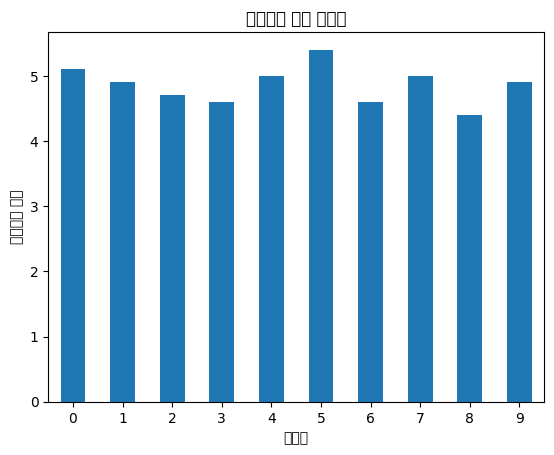

In [ ]:
#막대그래프 그리기 kind = 'bar'

import matplotlib.pyplot as plt
import pandas as pd
filename = 'iris.csv'
iris = pd.read_csv(filename)
iris.head()
iris.SepalLength[:10].plot(kind='bar', rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel("데이터")
plt.ylabel("꽃받침의 길이")
plt.show()

In [ ]:
#붓꽃 종류별 꼭 받침 길이의 평균에 대한 시각화

df2=iris.groupby(iris['Species']).mean()
df2

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

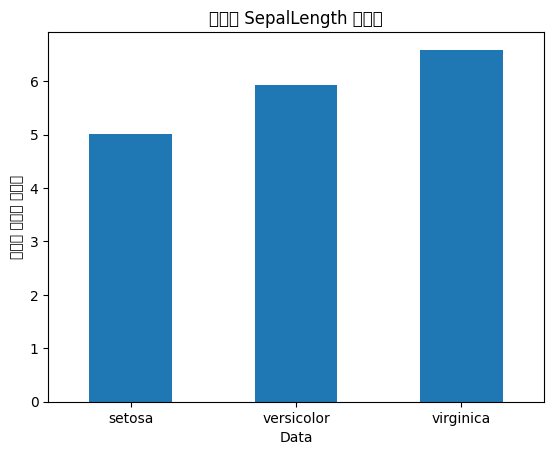

In [ ]:
df2.SepalLength[:].plot(kind='bar', rot=0)
plt.title('품종별 SepalLength 그래프')
plt.xlabel('Data')
plt.ylabel('꽃받침 길이의 평균값')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51669 (\N{HANGUL SYLLABLE JING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packa

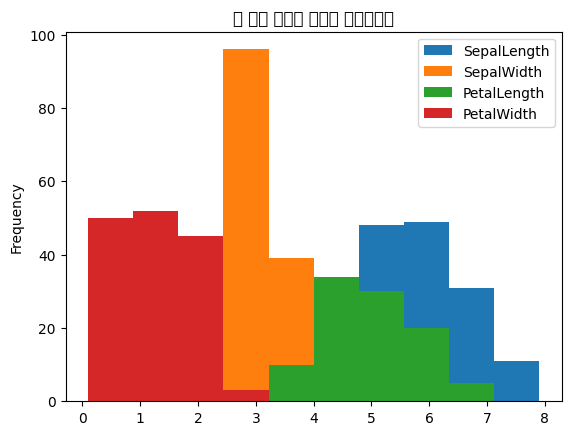

In [ ]:
#히스토그램 그리기

#각 특징 값들의 빈도수 그래프
iris.plot(kind='hist')
plt.title('각 특징 값들의 빈도수 히스토그램')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

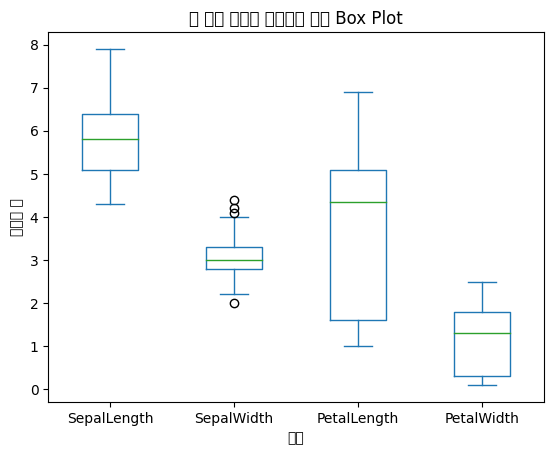

In [ ]:
#상자 그래프 그리기

#각 특징 값들의 빈도수 그래프

iris.plot(kind='box')
plt.title('각 특징 값들의 빈도수에 대한 Box Plot')
plt.xlabel('특징')
plt.ylabel('데이터 값')
plt.show()

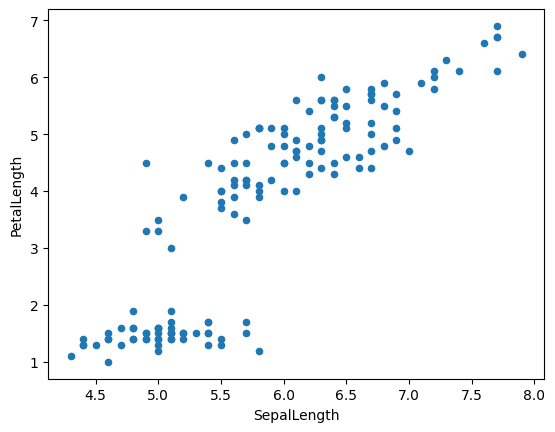

In [ ]:
#산점도 그래프 그리기

iris.plot(x='SepalLength', y='PetalLength', kind='scatter')
plt.show()


# 2. 타이타닉 데이터 분석


2.1 데이터 읽어오기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#요금 기준으로 내림차순 정렬

titanic.sort_values('Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
...,...,...,...,...,...,...,...,...,...,...,...
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0000,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0000,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.000000,0,0,19972,0.0000,S
732,733,0,2,"Knight, Mr. Robert J",male,29.699118,0,0,239855,0.0000,S


In [ ]:
#생존자별 인원수 출력

pd.DataFrame(titanic['Survived'].value_counts())

,count
Survived,
0,549
1,342


2.1 타이타닉 데이터 전처리
  - 결측데이터 확인 / 처리

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked 컬럼에 결측데이터 존재

In [ ]:
#결측데이터가 너무 많은 Cabin 컬럼 삭제

titanic.drop(['Cabin'], axis=1, inplace=True)
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
#결측데이터 최빈값으로 대체하기

#최빈값 찾기
titanic['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic['Embarked'].fillna('S')
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
#결측데이터 평균값으로 대체하기

avg = titanic['Age'].mean()
#평균이 어떻게 구해지는걸까?
titanic['Age']=titanic['Age'].fillna(avg)

2.3 데이터 그룹핑하기

In [ ]:
#항구별 Pclass 칼럼의 평균값을 출력

titanic['Pclass'].groupby(titanic["Embarked"]).mean()

#작은 따옴표와 큰 따옴표 사용의 차이..?

Embarked
C    1.886905
Q    2.909091
S    2.350932
Name: Pclass, dtype: float64

In [ ]:
titanic.groupby(["Pclass", "Sex"]).mean()
#??

TypeError: Could not convert Cumings, Mrs. John Bradley (Florence Briggs Thayer)Futrelle, Mrs. Jacques Heath (Lily May Peel)Bonnell, Miss. ElizabethSpencer, Mrs. William Augustus (Marie Eugenie)Harper, Mrs. Henry Sleeper (Myna Haxtun)Icard, Miss. AmelieFortune, Miss. Mabel HelenNewsom, Miss. Helen MonypenyPears, Mrs. Thomas (Edith Wearne)Chibnall, Mrs. (Edith Martha Bowerman)Isham, Miss. Ann ElizabethBrown, Mrs. James Joseph (Margaret Tobin)Lurette, Miss. EliseNewell, Miss. MadeleineBazzani, Miss. AlbinaHarris, Mrs. Henry Birkhardt (Irene Wallach)Thorne, Mrs. Gertrude MaybelleCherry, Miss. GladysWard, Miss. AnnaGraham, Mrs. William Thompson (Edith Junkins)Bissette, Miss. AmeliaAndrews, Miss. Kornelia TheodosiaBarber, Miss. Ellen "Nellie"Bishop, Mrs. Dickinson H (Helen Walton)Allison, Miss. Helen LoraineBaxter, Mrs. James (Helene DeLaudeniere Chaput)Fleming, Miss. MargaretPenasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)Francatelli, Miss. Laura MabelHays, Miss. Margaret BechsteinRyerson, Miss. Emily BorieWick, Miss. Mary NatalieSpedden, Mrs. Frederic Oakley (Margaretta Corning Stone)Young, Miss. Marie GriceHippach, Miss. Jean GertrudeFrauenthal, Mrs. Henry William (Clara Heinsheimer)Burns, Miss. Elizabeth MargaretFortune, Miss. Alice ElizabethBowerman, Miss. Elsie EdithWarren, Mrs. Frank Manley (Anna Sophia Atkinson)Aubart, Mme. Leontine PaulineMeyer, Mrs. Edgar Joseph (Leila Saks)Bidois, Miss. RosalieHolverson, Mrs. Alexander Oskar (Mary Aline Towner)Newell, Miss. MarjorieMinahan, Miss. Daisy ECarter, Miss. Lucile PolkKenyon, Mrs. Frederick R (Marion)Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)Eustis, Miss. Elizabeth MusseyAllison, Mrs. Hudson J C (Bessie Waldo Daniels)Maioni, Miss. RobertaRothschild, Mrs. Martin (Elizabeth L. Barrett)Perreault, Miss. AnneHippach, Mrs. Louis Albert (Ida Sophia Fischer)LeRoy, Miss. BerthaFrolicher, Miss. Hedwig MargarithaCrosby, Miss. Harriet RDuff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")Taussig, Mrs. Emil (Tillie Mandelbaum)Appleton, Mrs. Edward Dale (Charlotte Lamson)Silvey, Mrs. William Baird (Alice Munger)Thayer, Mrs. John Borland (Marian Longstreth Morris)Taussig, Miss. RuthStephenson, Mrs. Walter Bertram (Martha Eustis)Shutes, Miss. Elizabeth WLongley, Miss. Gretchen FiskeSagesser, Mlle. EmmaTaylor, Mrs. Elmer Zebley (Juliet Cummins Wright)Madill, Miss. Georgette AlexandraAstor, Mrs. John Jacob (Madeleine Talmadge Force)Cleaver, Miss. AliceMayne, Mlle. Berthe Antonine ("Mrs de Villiers")Endres, Miss. Caroline LouiseAllen, Miss. Elisabeth WaltonRyerson, Miss. Susan Parker "Suzette"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)Carter, Mrs. William Ernest (Lucile Polk)Hogeboom, Mrs. John C (Anna Andrews)Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)Dick, Mrs. Albert Adrian (Vera Gillespie)Leader, Dr. Alice (Farnham)Chambers, Mrs. Norman Campbell (Bertha Griggs)Hays, Mrs. Charles Melville (Clara Jennings Gregg)Stone, Mrs. George Nelson (Martha Evelyn)Compton, Miss. Sara RebeccaSerepeca, Miss. AugustaGoldenberg, Mrs. Samuel L (Edwiga Grabowska)Lines, Miss. Mary ConoverWick, Mrs. George Dennick (Mary Hitchcock)Swift, Mrs. Frederick Joel (Margaret Welles Barron)Beckwith, Mrs. Richard Leonard (Sallie Monypeny)Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)Graham, Miss. Margaret Edith to numeric

2.4 데이터 시각화

<Axes: xlabel='Pclass', ylabel='count'>

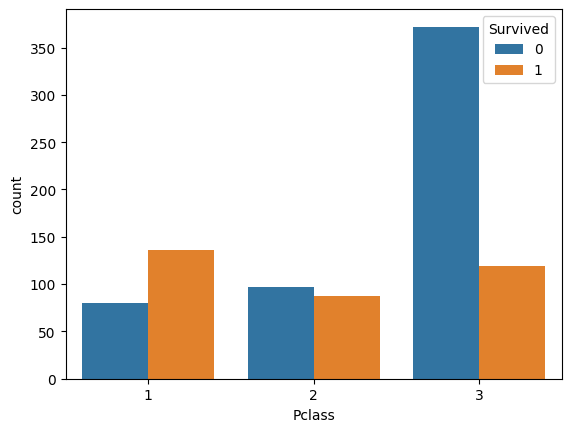

In [ ]:
#좌석 등급별 생존자 확인

import seaborn as sns
sns.countplot(x='Pclass', hue='Survived', data = titanic)



TypeError: countplot() got multiple values for argument 'data'

'Pclass' 앞에 'x=' 을 추가했더니 정상적으로 출력됨

<Axes: >

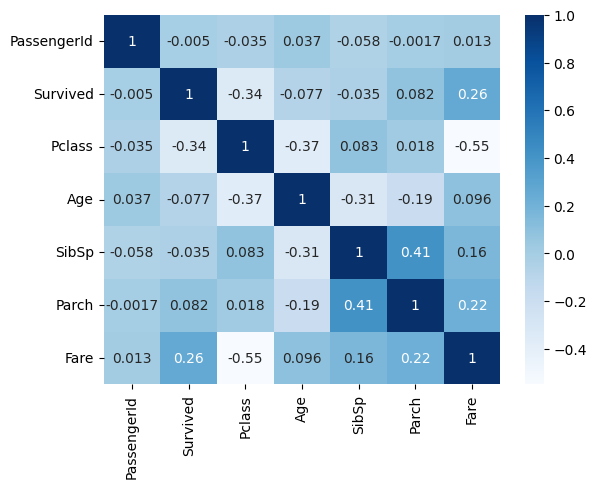

In [ ]:
#상관관계 확인 - 시본 모듈로 히트맵 그래프 그리기
numeric_titanic = titanic.select_dtypes(include='number')
corr_matrix = numeric_titanic.corr()
sns.heatmap(data=corr_matrix, annot=True, cmap='Blues')

책에 나와 있는대로 하면
ValueError: could not convert string to float: 'Braund, Mr. Owen Harris' 오류가 뜸

-> numeric_titanic = titanic.select_dtypes(include='number') 로 숫자형 데이터만 선택해서 히트맵을 만들어야 정상적으로 출력됨